## 1. Import the necessary libraries

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import import_ipynb
from EDASentimentAnalysis import remove_pucntuation,remove_stopword
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from pyvi import ViTokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2 Data preprocessing

>Read CSV

In [45]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [46]:
X_train,y_train = ReadData("../DataPhone/trainprocessed.csv")
X_test,y_test=ReadData("../DataPhone/testprocesssed.csv")

In [48]:
print(X_test[128])

sản_phẩm sài tạm thích camera pin trâu còn đt sài ko biết bạn nào giống mình ko sài ứng_dụng dể một tối bấm hoài mới cài nhạc chuông điện_thoại hay mất


In [38]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(7786,)
y_train size (7786,)


> word separation

In [39]:
def wordseparation(comment):
    return [review.split() for review in comment]

> Execute function

In [40]:
X_train=wordseparation(X_train)
X_test=wordseparation(X_test)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")

X_Train: [['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', '832019', 'tình_trạng', 'pin', 'còn', '88', 'ai', 'giống', 'tôi'], ['sao', 'gọi', 'điện_thoại', 'màn_hình', 'chấm', 'nhỏ', 'nháy', 'gần', 'camera', 'vậylúc']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ôk', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', '45', 'tuy', 'chip', '439', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivo91c', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]


>Create  Corpus

In [41]:
def CreateCorpus(Vi):
    tokenizer=Tokenizer(oov_token='<oov>')
    tokenizer.fit_on_texts(Vi)
    return tokenizer

> Execute function

In [42]:
X_train_corpus=CreateCorpus(X_train)
X_test_corpus=CreateCorpus(X_test)
print(X_train_corpus.word_index)
print(X_test_corpus.word_index)

{'<oov>': 1, 'máy': 2, 'mua': 3, 'pin': 4, 'mình': 5, 'game': 6, 'dùng': 7, 'mới': 8, 'tốt': 9, 'chơi': 10, 'ko': 11, 'quá': 12, 'ok': 13, '1': 14, 'giá': 15, 'đẹp': 16, 'mượt': 17, 'nhanh': 18, 'sạc': 19, 'ngày': 20, 'ổn': 21, 'camera': 22, 'còn': 23, 'chụp': 24, 'thấy': 25, 'tầm': 26, 'xài': 27, 'hơn': 28, 'k': 29, 'về': 30, 'màn_hình': 31, 'trâu': 32, 'trong': 33, 'hơi': 34, 'đc': 35, 'khá': 36, 'sản_phẩm': 37, '2': 38, 'lỗi': 39, 'tay': 40, 'tháng': 41, 'sao': 42, 'hay': 43, 'nhân_viên': 44, 'mọi': 45, 'sử_dụng': 46, 'con': 47, 'hình': 48, 'sài': 49, 'hết': 50, 'vân': 51, 'nói_chung': 52, 'nhiệt_tình': 53, 'ngon': 54, 'thứ': 55, 'nóng': 56, 'lắm': 57, '3': 58, 'nghe': 59, 'nó': 60, 'loa': 61, 'luôn': 62, 'điện_thoại': 63, 'khác': 64, 'tệ': 65, 'lag': 66, 'ảnh': 67, 'người': 68, 'wifi': 69, 'xem': 70, 'mấy': 71, 'ở': 72, 'nào': 73, 'biết': 74, 'bạn': 75, 'lần': 76, 'cấu_hình': 77, 'dc': 78, 'đổi': 79, 'nói': 80, 'hàng': 81, 'sáng': 82, 'tôi': 83, 'đt': 84, 'cả': 85, 'đơ': 86, 'tuần'

In [10]:
print(f"Total Word in Corpus of train: ({len(X_train_corpus.word_index)})")
print(f"Total Word in Corpus of test: ({len(X_test_corpus.word_index)})")

Total Word in Corpus of train: (11617)
Total Word in Corpus of test: (5352)


> longest sentence in the training set, longest sentence in the test set

In [11]:
max_sentence_Xtrain= max([len(i) for i in  (X_train)])
print(f"max_sentence_Xtrain:{max_sentence_Xtrain} word")
max_sentence_Xtest=max([len(i) for i in (X_test)])
print(f"max_sentence_Xtest:{max_sentence_Xtest} word")

max_sentence_Xtrain:129 word
max_sentence_Xtest:131 word


> Generate input training data by converting words to indexes and performing padding to bring into the model

In [12]:
def Padding(Vi):
    vi_sequence=X_train_corpus.texts_to_sequences(Vi)
    vi_sequence=pad_sequences(vi_sequence,maxlen=max_sentence_Xtest,padding='pre')
    return vi_sequence

> Execute Function

In [13]:
X_train=Padding(X_train)
X_test=Padding(X_test)
print(X_train[0])
print(X_test[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    4   97   23 1337  130    3 4651  360    4
   23 3322  117  356   83]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0

>Convert labels to numbers

In [14]:
label_encoder=LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
print(y_train_encoded[0:3])

[1 0 1]


>Convert number to one_hot_vector

In [15]:
y_train_one_hot=to_categorical(y_train_encoded)
print(y_train_one_hot[0:3])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## 3.Built Model LSTM

### 3.1. Design configuration for LSTM network

In [15]:
dropout=0.3
total_word=len(X_train_corpus.word_index)
num_classes=3
embedding_size = 128
num_lstm_units = 15
epochs=12

### 3.2. Model LSTM

In [16]:
model = Sequential()
model.add(Embedding(total_word, embedding_size, input_length=max_sentence_Xtest, name='embedding_layer'))
model.add(LSTM(num_lstm_units, return_sequences=True,name='LSTM_layer_1'))
model.add(Dropout(dropout,name='Dropout_layer_1'))
model.add(LSTM(num_lstm_units,name='LSTM_layer_2'))
model.add(Dense(num_classes, activation='softmax'))

c:\Users\hdang\.virtualenvs\DM-xmUrTfoX\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### 3.3. Hyperparameter

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### 3.4. Train

 >Monitor the trainning process to stop earlier

In [18]:
# Khởi tạo callback EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss', 
    patience=9,          
    restore_best_weights=True  
)

In [19]:
model.fit(X_train, 
          y_train_one_hot, 
          verbose=1, epochs=epochs,
          batch_size=32,
          validation_split=0.2, 
          callbacks=[early_stopping_callback] )

Epoch 1/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.6457 - loss: 0.8422 - val_accuracy: 0.8196 - val_loss: 0.5184
Epoch 2/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.8429 - loss: 0.4239 - val_accuracy: 0.8203 - val_loss: 0.5009
Epoch 3/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.8748 - loss: 0.3146 - val_accuracy: 0.7978 - val_loss: 0.5792
Epoch 4/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.9203 - loss: 0.2248 - val_accuracy: 0.7792 - val_loss: 0.6306
Epoch 5/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9363 - loss: 0.1741 - val_accuracy: 0.7760 - val_loss: 0.7526
Epoch 6/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9550 - loss: 0.1339 - val_accuracy: 0.7754 - val_loss: 0.7898
Epoch 7/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.9677 - loss: 0.1018 - val_accuracy: 0.7734 - val_loss: 0.8522
Epoch 8/12
195/195 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.9766 - loss: 0.0779 - 

>Network Architecture

In [20]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ (None, 131, 128)       │     1,486,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer_1 (LSTM)             │ (None, 131, 15)        │         8,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_layer_1 (Dropout)       │ (None, 131, 15)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer_2 (LSTM)             │ (None, 15)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,492,574 (17.14 MB)

 Trainable params: 1,497,524 (5.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,995,050 (11.43 MB)

None


> Network Architecture Diagram

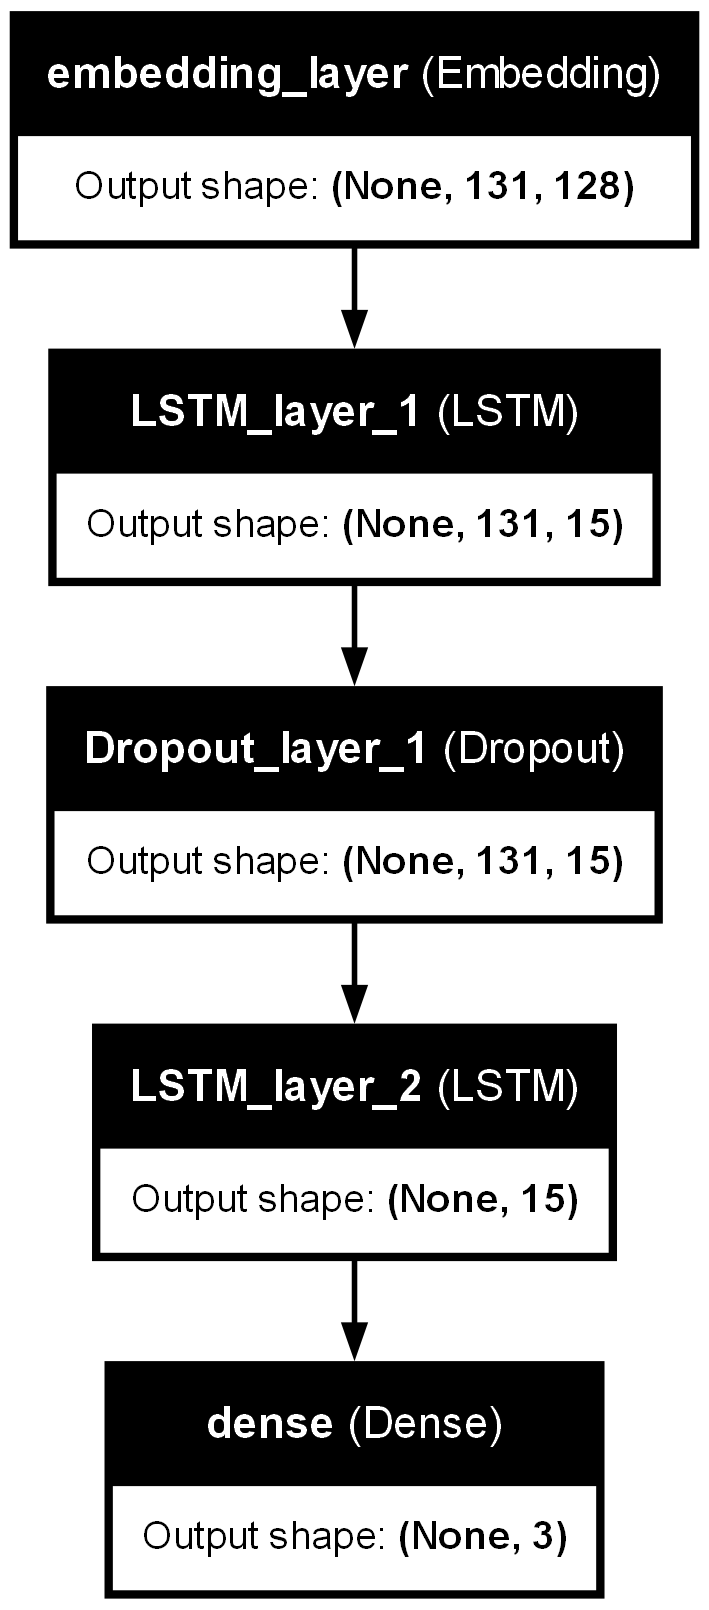

In [21]:
# Tạo đồ thị cho mô hình
plot_model(model, to_file='../Picture_Model/model_LSTM_sentiment.png', show_shapes=True, show_layer_names=True)

> Dump file models_sentiment.h5

In [22]:
model.save('../model/model_sentiment_lstm.h5')

### 3.5 Evaluation test dataset

> Load file model_sentiment_lstm.h5

In [16]:
model_sentiment=load_model("../model/model_sentiment_lstm.h5")

> Get the weight of the embedding layer

In [24]:
weights = model_sentiment.layers[0].get_weights()[0]

# Giảm chiều dữ liệu sử dụng t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(weights)
print(embeddings_2d[0:2])

[[-11.956992 -29.323278]
 [ 14.214277  18.87724 ]]


> Visualize the context and semantic correlation of words

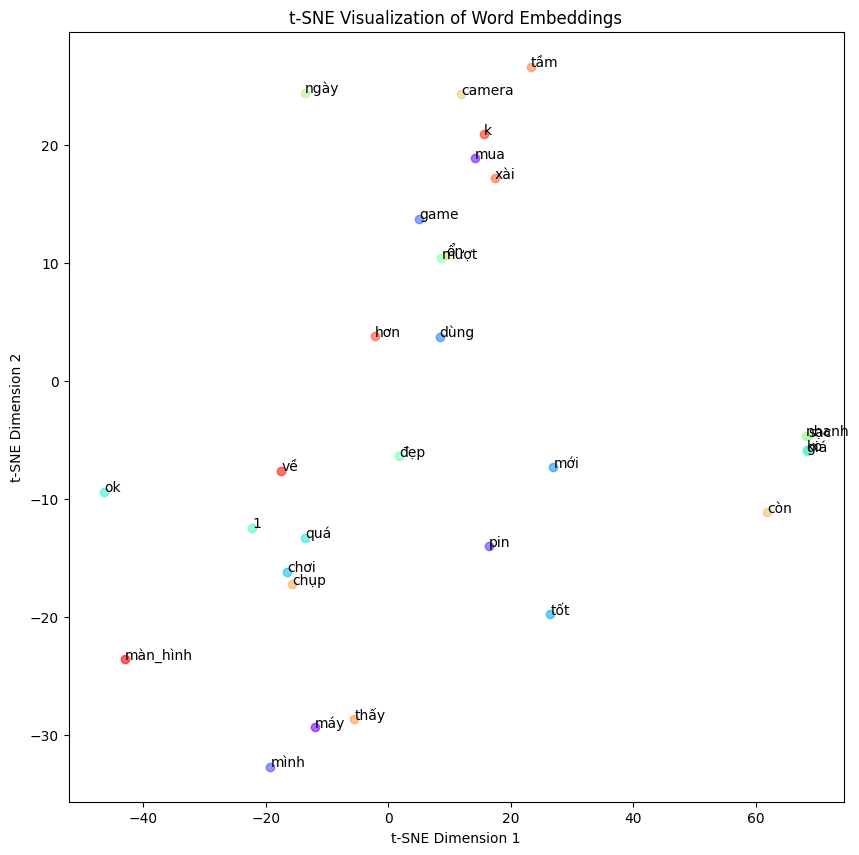

In [25]:
index_word_list = list(X_train_corpus.index_word)
# Vẽ trực quan hóa với nhãn từ
# Màu cho mỗi từ
colors = plt.cm.rainbow(np.linspace(0, 1, 30))
plt.figure(figsize=(10, 10))
for i, word in enumerate(index_word_list [1:31]):  
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], marker='o', color=colors[i], alpha=0.6, label=word)
    plt.annotate(X_train_corpus.index_word[word], (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings')
plt.show()


In [17]:
result = model_sentiment.predict(X_test)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [26]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[125:150])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[120:150])

[2 0 2 1 0 2 2 2 0 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 0]
['Positive' 'Positive' 'Negative' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Neutral' 'Negative' 'Positive' 'Positive'
 'Positive' 'Negative' 'Negative' 'Positive' 'Negative' 'Negative'
 'Positive' 'Negative' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Negative']


> Predict one a new sample

In [55]:
comment="Sản phẩm Sài cũng tạm thích cái camera và pin trâu. Còn đt đang sài ko biết có bạn nào giống mình ko lúc Sài ứng dụng nhưng dể một lúc thì tối  bấm hoài không lên. Để lúc mới lên  cài nhạc chuông cho điện thoại hay bị mất"
comment= remove_pucntuation(comment.lower())
comment= remove_stopword(comment)
comment= [ViTokenizer.tokenize(comment)]
separatemeaningfulwords = wordseparation(comment)
a_word_embedding=Padding(separatemeaningfulwords)
result_one=model_sentiment.predict(a_word_embedding)
predict_a_label=np.argmax(result_one,axis=1)
print(predict_a_label)
print(label_encoder.inverse_transform(predict_a_label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[1]
['Neutral']


In [29]:
accuracy = accuracy_score(y_test_encoded, predict_labels)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_encoded, predict_labels, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test_encoded, predict_labels, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test_encoded, predict_labels, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.8237
Precision: 0.7809
Recall: 0.8237
F1-score: 0.7879901244050629
